<a href="https://colab.research.google.com/github/faruk17035/Deep-Learning-Models/blob/main/Recurrent_Neural_Network_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1 - Data Preprocessing**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
import pandas as pd
from pandas import read_excel
df = '/content/gdrive/MyDrive/LSTM/Google_Stock_Price_Train.csv' 
dataset_train = pd.read_csv(df)
#df = pd.read_csv(file_name, index_col=0)
#df = pd.read_csv(file_name)
#print(df.head()) # print the first 5 rows
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)


[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


## Feature Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

In [19]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [21]:
df1 = pd.DataFrame(X_train)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.934445,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,0.946369,0.965697,0.975110,0.959670,0.978086,1.000000,0.980765,0.970831,0.984504,0.960544,0.937142,0.928417,0.908047,0.877186,0.921534,0.938091,0.931654,0.952545,0.888124,0.886375,0.870321,0.885631,0.907434,0.915712,0.899416,0.918056,0.908940,0.902485,0.894561,0.916009,0.913293,0.889798,0.865894,0.890301,0.903360,0.896421,0.917777,0.931766,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759
1194,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,0.946369,0.965697,0.975110,0.959670,0.978086,1.000000,0.980765,0.970831,0.984504,0.960544,0.937142,0.928417,0.908047,0.877186,0.921534,0.938091,0.931654,0.952545,0.888124,0.886375,0.870321,0.885631,0.907434,0.915712,0

In [22]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [23]:
df2 = pd.DataFrame(y_train)
df2

,0
0,0.086279
1,0.084716
2,0.074541
3,0.078838
4,0.072383
...,...
1193,0.952043
1194,0.951633
1195,0.957251
1196,0.937960


### Reshaping

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Part 2 - Building and Training the RNN**

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### initialising the RNN

In [26]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [29]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [30]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [31]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [32]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [33]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 60ms/step - loss: 0.0462
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0037
Epoch 13/100
38/38 [====

**Part 3 - Making the predictions and visualising the results**

### Getting the real stock price of 2017

In [34]:
import pandas as pd
from pandas import read_excel
df_test = '/content/gdrive/MyDrive/LSTM/Google_Stock_Price_Train.csv' 
dataset_test = pd.read_csv(df_test)
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Getting the predicted stock price of 2017

In [35]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

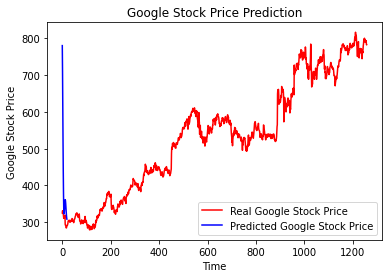

In [36]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()